In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.svm
import sklearn.metrics
import sklearn.tree
import sklearn.ensemble
import sklearn.gaussian_process
import sklearn.neural_network

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("communities.data", header=None)
print(data)

      0    1      2                       3    4     5     6     7     8    \
0       8    ?      ?            Lakewoodcity    1  0.19  0.33  0.02  0.90   
1      53    ?      ?             Tukwilacity    1  0.00  0.16  0.12  0.74   
2      24    ?      ?            Aberdeentown    1  0.00  0.42  0.49  0.56   
3      34    5  81440     Willingborotownship    1  0.04  0.77  1.00  0.08   
4      42   95   6096       Bethlehemtownship    1  0.01  0.55  0.02  0.95   
5       6    ?      ?       SouthPasadenacity    1  0.02  0.28  0.06  0.54   
6      44    7  41500             Lincolntown    1  0.01  0.39  0.00  0.98   
7       6    ?      ?               Selmacity    1  0.01  0.74  0.03  0.46   
8      21    ?      ?           Hendersoncity    1  0.03  0.34  0.20  0.84   
9      29    ?      ?             Claytoncity    1  0.01  0.40  0.06  0.87   
10      6    ?      ?            DalyCitycity    1  0.13  0.71  0.15  0.07   
11     36    ?      ?  RockvilleCentrevillage    1  0.02  0.46  

In [3]:
data.describe()

0            4            5            6            7    \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean     28.683551     5.493982     0.057593     0.463395     0.179629   
std      16.397553     2.873694     0.126906     0.163717     0.253442   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%      12.000000     3.000000     0.010000     0.350000     0.020000   
50%      34.000000     5.000000     0.020000     0.440000     0.060000   
75%      42.000000     8.000000     0.050000     0.540000     0.230000   
max      56.000000    10.000000     1.000000     1.000000     1.000000   

               8            9            10           11           12   ...  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean      0.753716     0.153681     0.144022     0.424218     0.493867  ...   
std       0.244039     0.208877     0.232492     0.155196     0.143564  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.630000     0.040000     0.010000     0.340000     0.410000  ...   
50%       0.850000     0.070000     0.040000     0.400000     0.480000  ...   
75%       0.940000     0.170000     0.160000     0.470000     0.540000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               96           97           98           99           100  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean      0.215552     0.608892     0.535050     0.626424     0.651530   
std       0.231134     0.204329     0.181352     0.200521     0.198221   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.060000     0.470000     0.420000     0.520000     0.560000   
50%       0.130000     0.630000     0.540000     0.670000     0.700000   
75%       0.280000     0.777500     0.660000     0.770000     0.790000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               118          119          120          125          127  
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  
mean      0.065231     0.232854     0.161685     0.094052     0.237979  
std       0.109459     0.203092     0.229055     0.240328     0.232985  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.020000     0.100000     0.020000     0.000000     0.070000  
50%       0.040000     0.170000     0.070000     0.000000     0.150000  
75%       0.070000     0.280000     0.190000     0.000000     0.330000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 102 columns]

In [4]:
correlations = data.corr()[127]
print("Correlations with target")
print(correlations)

Correlations with target
0     -0.211398
4     -0.032577
5      0.367157
6     -0.034923
7      0.631264
8     -0.684770
9      0.037622
10     0.293050
11     0.060477
12     0.153357
13     0.099347
14     0.067171
15     0.362897
16     0.082025
17    -0.424221
18    -0.305500
19    -0.153124
20    -0.576324
21     0.117977
22     0.574665
23    -0.098442
24    -0.439108
25    -0.352085
26    -0.209272
27    -0.275391
28    -0.090854
29    -0.155592
31    -0.244553
32     0.447582
33     0.521877
         ...   
76     0.421396
77    -0.319010
78    -0.470683
79     0.482816
80     0.021283
81    -0.109994
82     0.488243
83     0.364454
84    -0.210550
85    -0.190724
86    -0.172122
87    -0.251847
88    -0.240494
89    -0.232290
90    -0.239864
91     0.325045
92     0.063847
93     0.053763
94     0.375754
95     0.340277
96     0.194390
97    -0.077159
98    -0.155388
99     0.075558
100   -0.019459
118    0.196800
119    0.281390
120    0.153829
125    0.348627
127    1.000000

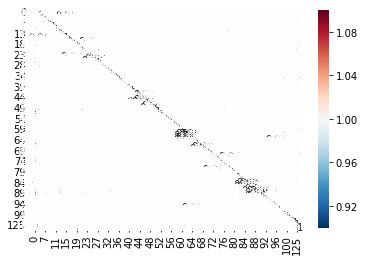

In [5]:
#Correclation
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=0, vmin=1, cmap="RdBu_r")

In [6]:
#remove unwanted columns
data.drop(126, inplace=True, axis=1)
data.drop(data.iloc[:, 121:127], inplace = True, axis = 1)
data.drop(data.iloc[:, 101:118], inplace = True, axis = 1)
data.drop(data.iloc[:, 1:3], inplace = True, axis = 1)
data = data.replace(to_replace='?', value=0)
print(data)

      0                       3    4     5     6     7     8     9     10   \
0       8            Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12  0.17   
1      53             Tukwilacity    1  0.00  0.16  0.12  0.74  0.45  0.07   
2      24            Aberdeentown    1  0.00  0.42  0.49  0.56  0.17  0.04   
3      34     Willingborotownship    1  0.04  0.77  1.00  0.08  0.12  0.10   
4      42       Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09  0.05   
5       6       SouthPasadenacity    1  0.02  0.28  0.06  0.54  1.00  0.25   
6      44             Lincolntown    1  0.01  0.39  0.00  0.98  0.06  0.02   
7       6               Selmacity    1  0.01  0.74  0.03  0.46  0.20  1.00   
8      21           Hendersoncity    1  0.03  0.34  0.20  0.84  0.02  0.00   
9      29             Claytoncity    1  0.01  0.40  0.06  0.87  0.30  0.03   
10      6            DalyCitycity    1  0.13  0.71  0.15  0.07  1.00  0.41   
11     36  RockvilleCentrevillage    1  0.02  0.46  0.08  0.91  

In [7]:
data.head()

0                    3    4     5     6     7     8     9     10    11   \
0    8         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12  0.17  0.34   
1   53          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45  0.07  0.26   
2   24         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17  0.04  0.39   
3   34  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12  0.10  0.51   
4   42    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09  0.05  0.38   

   ...   94   95    96    97    98    99    100   118   119   120  
0  ...  0.04  0.0  0.12  0.42  0.50  0.51  0.64  0.12  0.26  0.20  
1  ...  0.00  0.0  0.21  0.50  0.34  0.60  0.52  0.02  0.12  0.45  
2  ...  0.00  0.0  0.14  0.49  0.54  0.67  0.56  0.01  0.21  0.02  
3  ...  0.00  0.0  0.19  0.30  0.73  0.64  0.65  0.02  0.39  0.28  
4  ...  0.00  0.0  0.11  0.72  0.64  0.61  0.53  0.04  0.09  0.02  

[5 rows x 102 columns]

In [8]:
data.describe()

0            4            5            6            7    \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean     28.683551     5.493982     0.057593     0.463395     0.179629   
std      16.397553     2.873694     0.126906     0.163717     0.253442   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%      12.000000     3.000000     0.010000     0.350000     0.020000   
50%      34.000000     5.000000     0.020000     0.440000     0.060000   
75%      42.000000     8.000000     0.050000     0.540000     0.230000   
max      56.000000    10.000000     1.000000     1.000000     1.000000   

               8            9            10           11           12   ...  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean      0.753716     0.153681     0.144022     0.424218     0.493867  ...   
std       0.244039     0.208877     0.232492     0.155196     0.143564  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.630000     0.040000     0.010000     0.340000     0.410000  ...   
50%       0.850000     0.070000     0.040000     0.400000     0.480000  ...   
75%       0.940000     0.170000     0.160000     0.470000     0.540000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               94           95           96           97           98   \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean      0.029438     0.022778     0.215552     0.608892     0.535050   
std       0.102607     0.100400     0.231134     0.204329     0.181352   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.060000     0.470000     0.420000   
50%       0.000000     0.000000     0.130000     0.630000     0.540000   
75%       0.010000     0.000000     0.280000     0.777500     0.660000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               99           100          118          119          120  
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  
mean      0.626424     0.651530     0.065231     0.232854     0.161685  
std       0.200521     0.198221     0.109459     0.203092     0.229055  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.520000     0.560000     0.020000     0.100000     0.020000  
50%       0.670000     0.700000     0.040000     0.170000     0.070000  
75%       0.770000     0.790000     0.070000     0.280000     0.190000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 100 columns]

In [9]:
#label encode city column no 3
label_encoder = sklearn.preprocessing.LabelEncoder()
data[3] = label_encoder.fit(data[3]).transform(data[3])
data.describe()

0            3            4            5            6    \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean     28.683551   901.217653     5.493982     0.057593     0.463395   
std      16.397553   526.210333     2.873694     0.126906     0.163717   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%      12.000000   449.250000     3.000000     0.010000     0.350000   
50%      34.000000   892.000000     5.000000     0.020000     0.440000   
75%      42.000000  1354.750000     8.000000     0.050000     0.540000   
max      56.000000  1827.000000    10.000000     1.000000     1.000000   

               7            8            9            10           11   ...  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean      0.179629     0.753716     0.153681     0.144022     0.424218  ...   
std       0.253442     0.244039     0.208877     0.232492     0.155196  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.020000     0.630000     0.040000     0.010000     0.340000  ...   
50%       0.060000     0.850000     0.070000     0.040000     0.400000  ...   
75%       0.230000     0.940000     0.170000     0.160000     0.470000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               94           95           96           97           98   \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean      0.029438     0.022778     0.215552     0.608892     0.535050   
std       0.102607     0.100400     0.231134     0.204329     0.181352   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.060000     0.470000     0.420000   
50%       0.000000     0.000000     0.130000     0.630000     0.540000   
75%       0.010000     0.000000     0.280000     0.777500     0.660000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               99           100          118          119          120  
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  
mean      0.626424     0.651530     0.065231     0.232854     0.161685  
std       0.200521     0.198221     0.109459     0.203092     0.229055  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.520000     0.560000     0.020000     0.100000     0.020000  
50%       0.670000     0.700000     0.040000     0.170000     0.070000  
75%       0.770000     0.790000     0.070000     0.280000     0.190000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 101 columns]

In [10]:
data.head()

0     3    4     5     6     7     8     9     10    11   ...   94   95   \
0    8   804    1  0.19  0.33  0.02  0.90  0.12  0.17  0.34  ...  0.04  0.0   
1   53  1625    1  0.00  0.16  0.12  0.74  0.45  0.07  0.26  ...  0.00  0.0   
2   24     1    1  0.00  0.42  0.49  0.56  0.17  0.04  0.39  ...  0.00  0.0   
3   34  1787    1  0.04  0.77  1.00  0.08  0.12  0.10  0.51  ...  0.00  0.0   
4   42   141    1  0.01  0.55  0.02  0.95  0.09  0.05  0.38  ...  0.00  0.0   

    96    97    98    99    100   118   119   120  
0  0.12  0.42  0.50  0.51  0.64  0.12  0.26  0.20  
1  0.21  0.50  0.34  0.60  0.52  0.02  0.12  0.45  
2  0.14  0.49  0.54  0.67  0.56  0.01  0.21  0.02  
3  0.19  0.30  0.73  0.64  0.65  0.02  0.39  0.28  
4  0.11  0.72  0.64  0.61  0.53  0.04  0.09  0.02  

[5 rows x 102 columns]

In [11]:
#Convert to numpy
data = data.to_numpy()
print(data.shape)

(1994, 102)


In [12]:
#Scaling Data

X = data[:, :101]
y = data[:, 101:]
# data.head()

#Split Train and test data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

# print(X_train.shape)

#Remove city 
city = X_train[:,1]
X_train = np.delete(X_train, 1, 1)

# print(X_train.shape)

# Scale data
X_train = sklearn.preprocessing.StandardScaler().fit(X_train).transform(X_train)

In [13]:
# city
# X_train = np.insert(X_train,1, values=city, axis=1)
X_train = np.insert(X_train,1, values=city, axis=1)
print(X_train.shape)
print(y_train.shape)
y_train = y_train.astype(np.float64)

(1595, 101)
(1595, 1)


In [14]:
#Remove city 
city = X_test[:,1]
X_test = np.delete(X_test, 1, 1)

# print(X_train.shape)

# Scale data
X_test = sklearn.preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test = np.insert(X_test,1, values=city, axis=1)
print(X_test.shape)
print(X_test.shape)
y_test = y_test.astype(np.float64)

(399, 101)
(399, 101)


In [15]:
def errors_data(y_train, y_predict):
    mean_square_error = sklearn.metrics.mean_squared_error(y_train, y_predict)
    print("Root Mean Squared", mean_square_error)
    mean_absolut = sklearn.metrics.mean_absolute_error(y_train.ravel(), y_predict.ravel())
    print("Mean Absoulte Error", mean_absolut)
    return mean_square_error, mean_absolut

In [16]:
#Support Vector Regression
param_grid = {
    'gamma':np.arange(0.01,0.1,0.01)
}
SVR = sklearn.svm.SVR()
grid_search_cv = sklearn.model_selection.GridSearchCV(SVR, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train, y_predict)
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.3s finished


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.04945668755831268
Root Mean Squared 0.008178917288663903
Mean Absoulte Error 0.08630652472191258
Root Mean Squared 0.04615857076338952
Mean Absoulte Error 0.1648199243971372


In [17]:
#Decision Tree Regression
param_grid = {
    'splitter':['best', 'random'],
    "max_depth": np.arange(1, 100, 1),
}

decision_tree_regression = sklearn.tree.DecisionTreeRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(decision_tree_regression, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 3 folds for each of 198 candidates, totalling 594 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='random')
0.4285743241052273
Root Mean Squared 0.023995051667193873
Mean Absoulte Error 0.09888915725126579
Root Mean Squared 0.03305720563798941
Mean Absoulte Error 0.11266141611814355


[Parallel(n_jobs=1)]: Done 594 out of 594 | elapsed:   22.7s finished


In [18]:
#Random Forest Regression
param_grid = {
    'max_depth':np.arange(1,100,1),
}

random_forest_regression = sklearn.ensemble.RandomForestRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(random_forest_regression, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 99 candidates, totalling 297 fits


[Parallel(n_jobs=1)]: Done 297 out of 297 | elapsed:  2.3min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
0.6226765083727271
Root Mean Squared 0.003624689222613326
Mean Absoulte Error 0.03461697313796453
Root Mean Squared 0.020772708418509978
Mean Absoulte Error 0.0871644268357607


In [19]:
#Ada boost regression
param_grid = {
    'learning_rate': np.arange(1,2,0.1),
    'loss':['linear', 'square', 'exponential']
}
ada_boost_regression = sklearn.ensemble.AdaBoostRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(ada_boost_regression, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.0min finished


AdaBoostRegressor(base_estimator=None, learning_rate=1.8000000000000007,
                  loss='square', n_estimators=50, random_state=0)
0.5871520232836733
Root Mean Squared 0.012668432952285001
Mean Absoulte Error 0.0914002912742729
Root Mean Squared 0.02071857940649958
Mean Absoulte Error 0.10409313146500355


In [20]:
#Gaussian Process Regression
param_grid={
    'kernel': [sklearn.gaussian_process.kernels.WhiteKernel(), sklearn.gaussian_process.kernels.RBF()],
    'alpha' : [1e-11,1e-10,1e-9],
    'normalize_y':[True, False]
}
gaussian_process_regression = sklearn.gaussian_process.GaussianProcessRegressor()
grid_search_cv = sklearn.model_selection.GridSearchCV(gaussian_process_regression, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   52.4s finished


GaussianProcessRegressor(alpha=1e-11, copy_X_train=True,
                         kernel=RBF(length_scale=1), n_restarts_optimizer=0,
                         normalize_y=True, optimizer='fmin_l_bfgs_b',
                         random_state=None)
-0.0023134975568280883
Root Mean Squared 5.1778303537597695e-24
Mean Absoulte Error 1.5796106748902125e-12
Root Mean Squared 0.05508297596572146
Mean Absoulte Error 0.1597822127837829


In [21]:
#linear regression
param_grid={
    'fit_intercept':[True, False],
    'normalize':[True, False],
}
linear_regression = sklearn.linear_model.LinearRegression()
grid_search_cv = sklearn.model_selection.GridSearchCV(linear_regression, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.6290656753177025
Root Mean Squared 0.015711640481932215
Mean Absoulte Error 0.08987689998510177
Root Mean Squared 0.020157575376385257
Mean Absoulte Error 0.10127725882577597


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished


In [22]:
#neural network regression
hidden_layer_size = [(x, ) for x in np.arange(1, 50,1)]
param_grid={
    'hidden_layer_sizes': hidden_layer_size,
    'activation' : ['logistic', 'tanh', 'relu'],
}
neural_network_regression = sklearn.neural_network.MLPRegressor(random_state=0)
grid_search_cv = sklearn.model_selection.GridSearchCV(neural_network_regression, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train, y_train.ravel())
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
y_predict = grid_search_cv.best_estimator_.predict(X_train)
mean_square_error, mean_absolut = errors_data(y_train.ravel(), y_predict.ravel())
y_predict = grid_search_cv.best_estimator_.predict(X_test)
mean_square_error, mean_absolut = errors_data(y_test, y_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 297 candidates, totalling 891 fits


[Parallel(n_jobs=1)]: Done 891 out of 891 | elapsed:  9.0min finished


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(47,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
0.6243395894714969
Root Mean Squared 0.012537721751536241
Mean Absoulte Error 0.07195424719333407
Root Mean Squared 0.017255112490560134
Mean Absoulte Error 0.0856089041296395
